In [2]:
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt

In [4]:
x = [10, 20, 30, 40]
y = [0, 15, 10, 25]

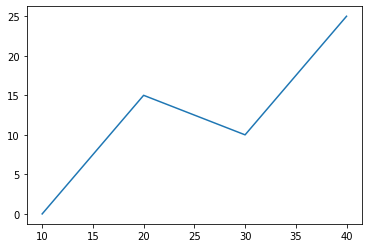

In [5]:
plt.plot(x,y)

Starting the seaborn code

In [6]:
sns.set()

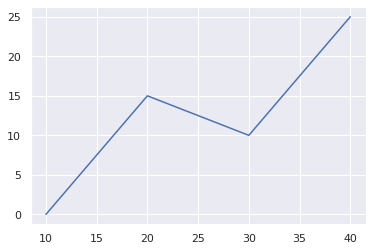

In [8]:
plt.plot(x,y)

Seaborn with pandas

In [10]:
cars = sns.load_dataset('mpg')

In [11]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


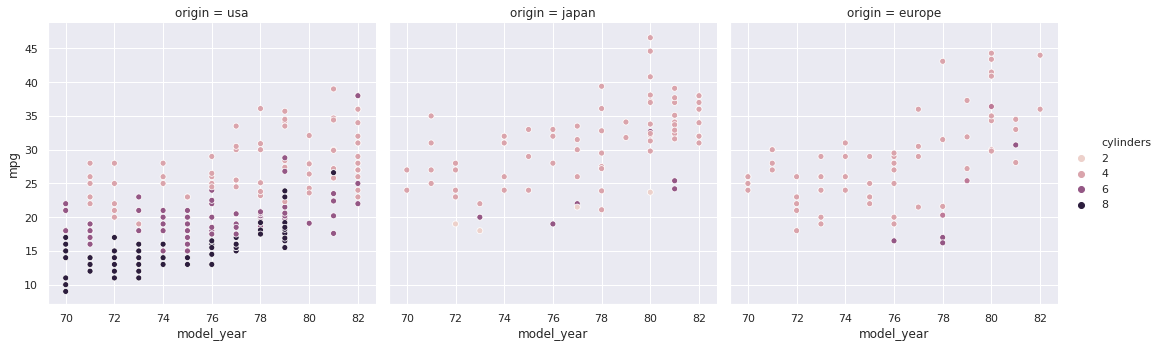

In [12]:
sns.relplot(x='model_year', y='mpg', col='origin', hue='cylinders',
            data = cars);

Scatterplot

In [14]:
diamonds = sns.load_dataset('diamonds')

In [17]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
#making a data set with only 100 observations and only premium, good, D, F, and J diamonds
diamonds = diamonds[
            diamonds.cut.isin(['Premium', 'Good']) &
            diamonds.color.isin(['D', 'F', 'J'])
            ].sample(n=100, random_state=22)
diamonds.shape


(100, 10)

In [79]:
sns.set_style('dark')

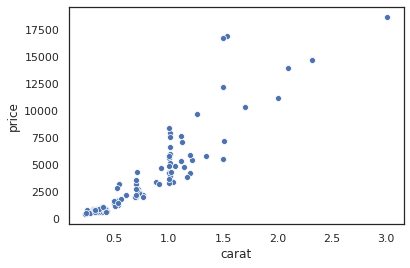

In [78]:
#sns.scatterplot(x, y)
# or sns.scatterplot(x = 'carat', y = 'price')
sns.scatterplot(diamonds.carat, diamonds.price);

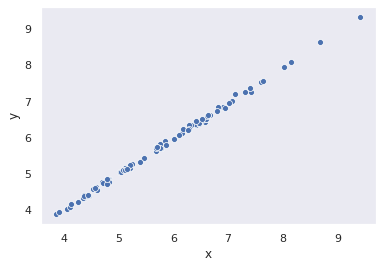

In [22]:
sns.scatterplot(x='x', y='y', data=diamonds)

changing semantic variables

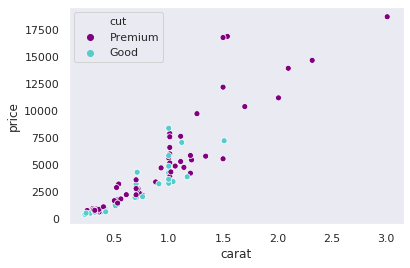

In [25]:
#hue = color -- can put columns in
#palette = color scheme
sns.scatterplot(x='carat', y='price', hue = 'cut',
                    data = diamonds,
                    palette=['purple', '#55CCCC']);

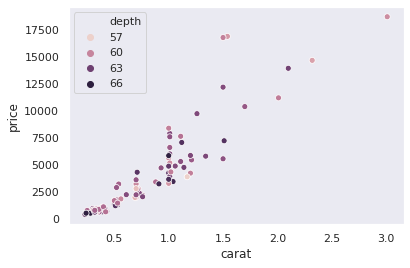

In [28]:
#hue can take continuous variables as well
sns.scatterplot(x='carat', y='price', hue = 'depth',
                    data = diamonds
                    );

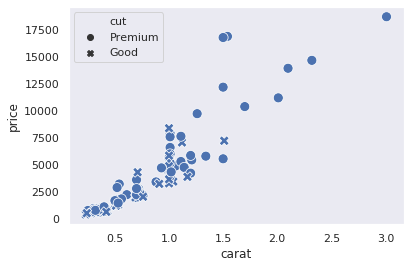

In [30]:
#style = changes the style of dots categorically
#s = changes the size of the dots
sns.scatterplot(x='carat', y='price', style='cut',
                    data = diamonds,
                    s=100
                    );

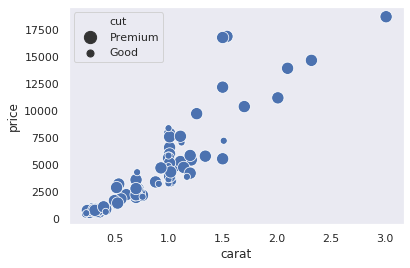

In [33]:
#size = changes size per variable -- can also use continuous
#sizes = sets the sizes to use
sns.scatterplot(x='carat', y='price', size='cut',
                    data = diamonds,
                    sizes=[150,50]
                    );

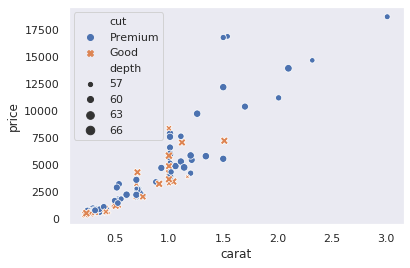

In [89]:
#all three
sns.scatterplot(x='carat', y='price',
                    hue = 'cut',
                    size = 'depth',
                    style = 'cut',
                    data = diamonds,
                    s=100
                    );

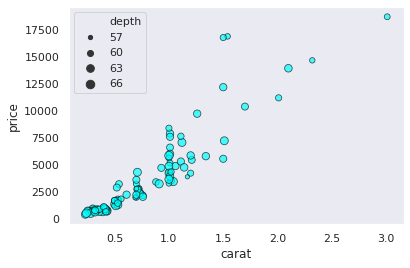

In [97]:
sns.scatterplot(x='carat', y='price',
                    size = 'depth',
                    data = diamonds,
                    Alpha= .7,
                    edgecolor = 'black',
                    color = 'cyan',
                    );

Other Options:
alpha = transparency
marker = types of markers (*)
edgecolor = gives points outlines

Heatplot

In [38]:
import numpy as np

In [37]:
cars = sns.load_dataset('mpg')

getting values to graph with

In [40]:
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

In [81]:
origin_cyl = (
 cars
 .groupby('origin')
 .cylinders
 .value_counts()
 .unstack()
 .fillna(0)
)
origin_cyl

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


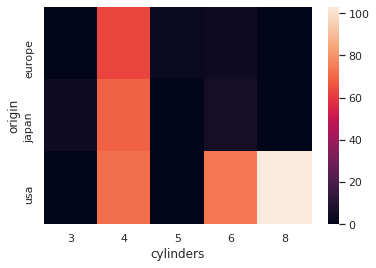

In [44]:
sns.heatmap(origin_cyl)

In [45]:
#can also use arrays
test_array = np.array([[1,2], [3,4]])

test_array

array([[1, 2],
       [3, 4]])

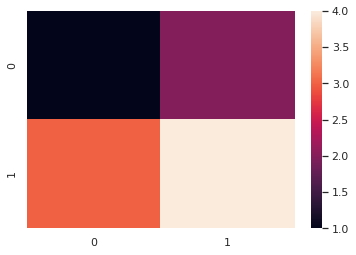

In [46]:
sns.heatmap(test_array)

Transpose

In [47]:
origin_cyl.T

origin,europe,japan,usa
cylinders,,,
3,0.0,4.0,0.0
4,63.0,69.0,72.0
5,3.0,0.0,0.0
6,4.0,6.0,74.0
8,0.0,0.0,103.0


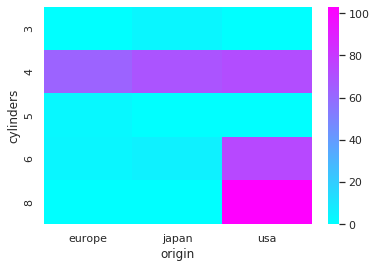

In [113]:
sns.heatmap(origin_cyl.T, cmap='cool');

Checking correlation

In [49]:
#can use heatmap for correlations as well
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


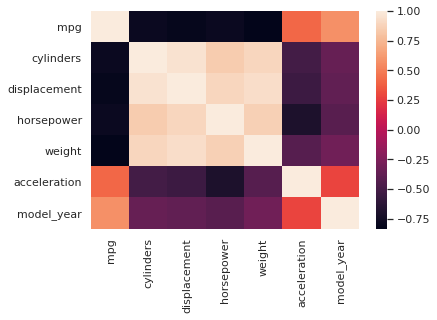

In [50]:
sns.heatmap(cars.corr())

Seaborn has 170 color palletes

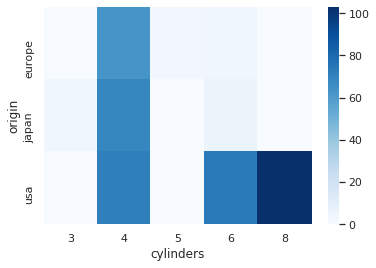

In [51]:
sns.heatmap(origin_cyl, cmap="Blues")

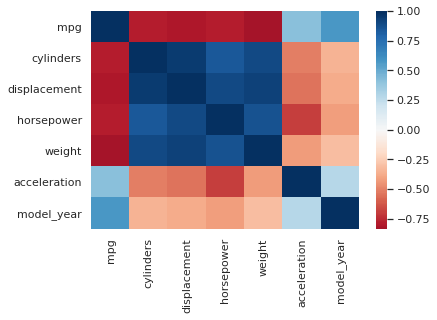

In [54]:
#making sure the center is white on a divergent pallete
sns.heatmap(cars.corr(), cmap="RdBu", center=0)

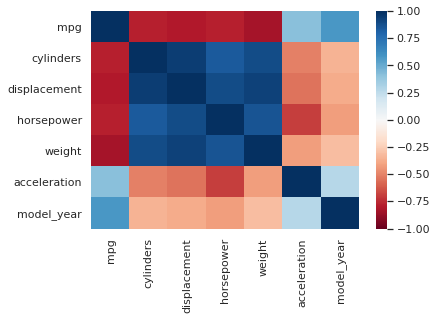

In [55]:
#setting the upper and lower bounds for the pallete
sns.heatmap(cars.corr(), cmap="RdBu", vmin=-1, vmax=1)

annotations

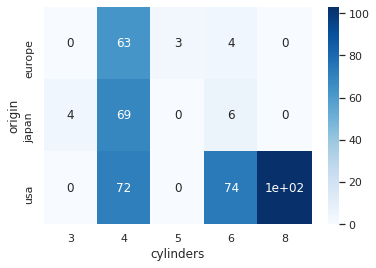

In [56]:
#annotations add the numbers on top of the heatmap
sns.heatmap(origin_cyl, cmap="Blues", annot=True)

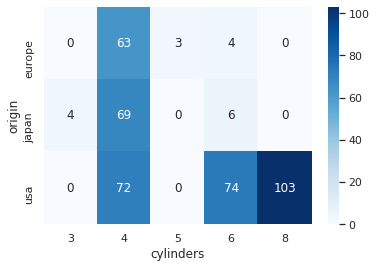

In [57]:
#can change the format of the numbers with fmt
sns.heatmap(origin_cyl, cmap="Blues", annot=True, fmt=".0f")

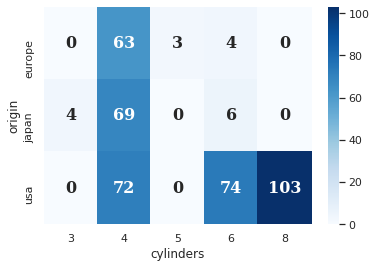

In [63]:
#can change more formats with annot_kws -- like fontsize
sns.heatmap(origin_cyl,
             cmap="Blues", 
             annot=True, 
             fmt=".0f",
             annot_kws={
                'fontsize' : 16,
                'fontweight' : 'bold',
                'fontfamily' : 'serif',
                #'color' : 'black'
             }
             );

Additional style:
linewidth
linecolor
xticklabels
yticklables
